In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(palette='viridis', font_scale=2, font='times', style='white')

# extract holidays from file
holiday_df = pd.read_csv('../data/holidays2017_2024.csv', dtype='str')
holiday_df['Date'] = holiday_df['Date'].astype('datetime64[ns]')
holidays = holiday_df.loc[holiday_df['Jurisdiction'] == 'sa', ['Date', 'Holiday Name']]

# import and preprocess data
df = pd.read_csv('../data/sa/merged.csv')
df['datetime'] = df['datetime'].astype('datetime64')
dt = df['datetime'].dt
df['date'] = dt.date
df['year'] = dt.year
df['month'] = dt.month
df['day'] = dt.day
df['hour'] = dt.hour
df['dow'] = dt.day_of_week
df['week'] = dt.isocalendar().week

merged = pd.merge(dt.floor('D'), holidays, left_on='datetime', right_on='Date', how='left')
df['holiday'] = merged['Holiday Name']

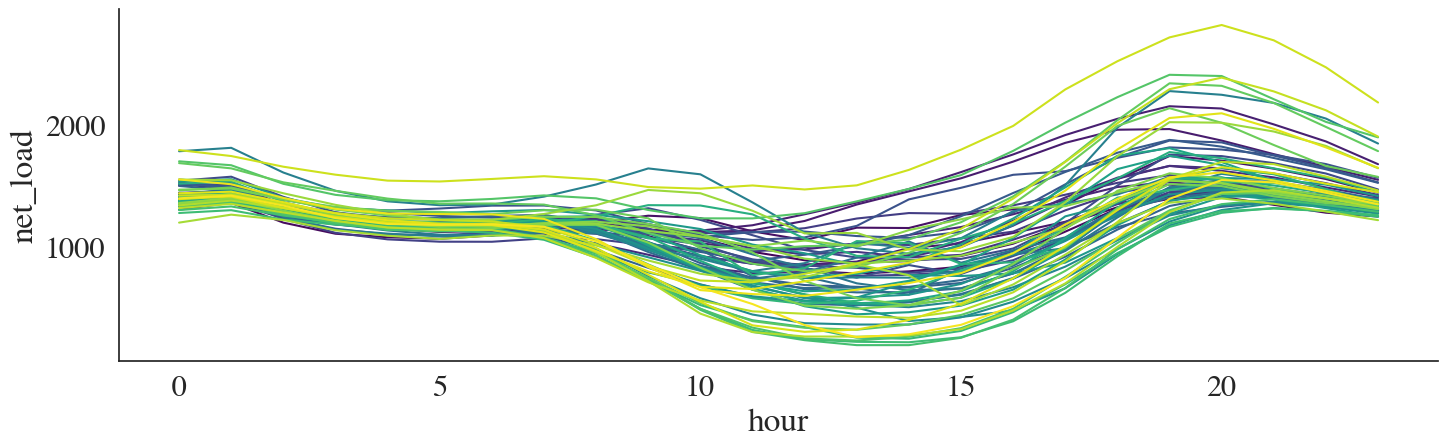

In [30]:
df_holidays = df[df['holiday'].notna()]
g = sns.relplot(df_holidays.reset_index(), x='hour', y='net_load', kind='line',
                hue='date', palette='viridis', legend=None, aspect=3)
#g.savefig('../plots/')

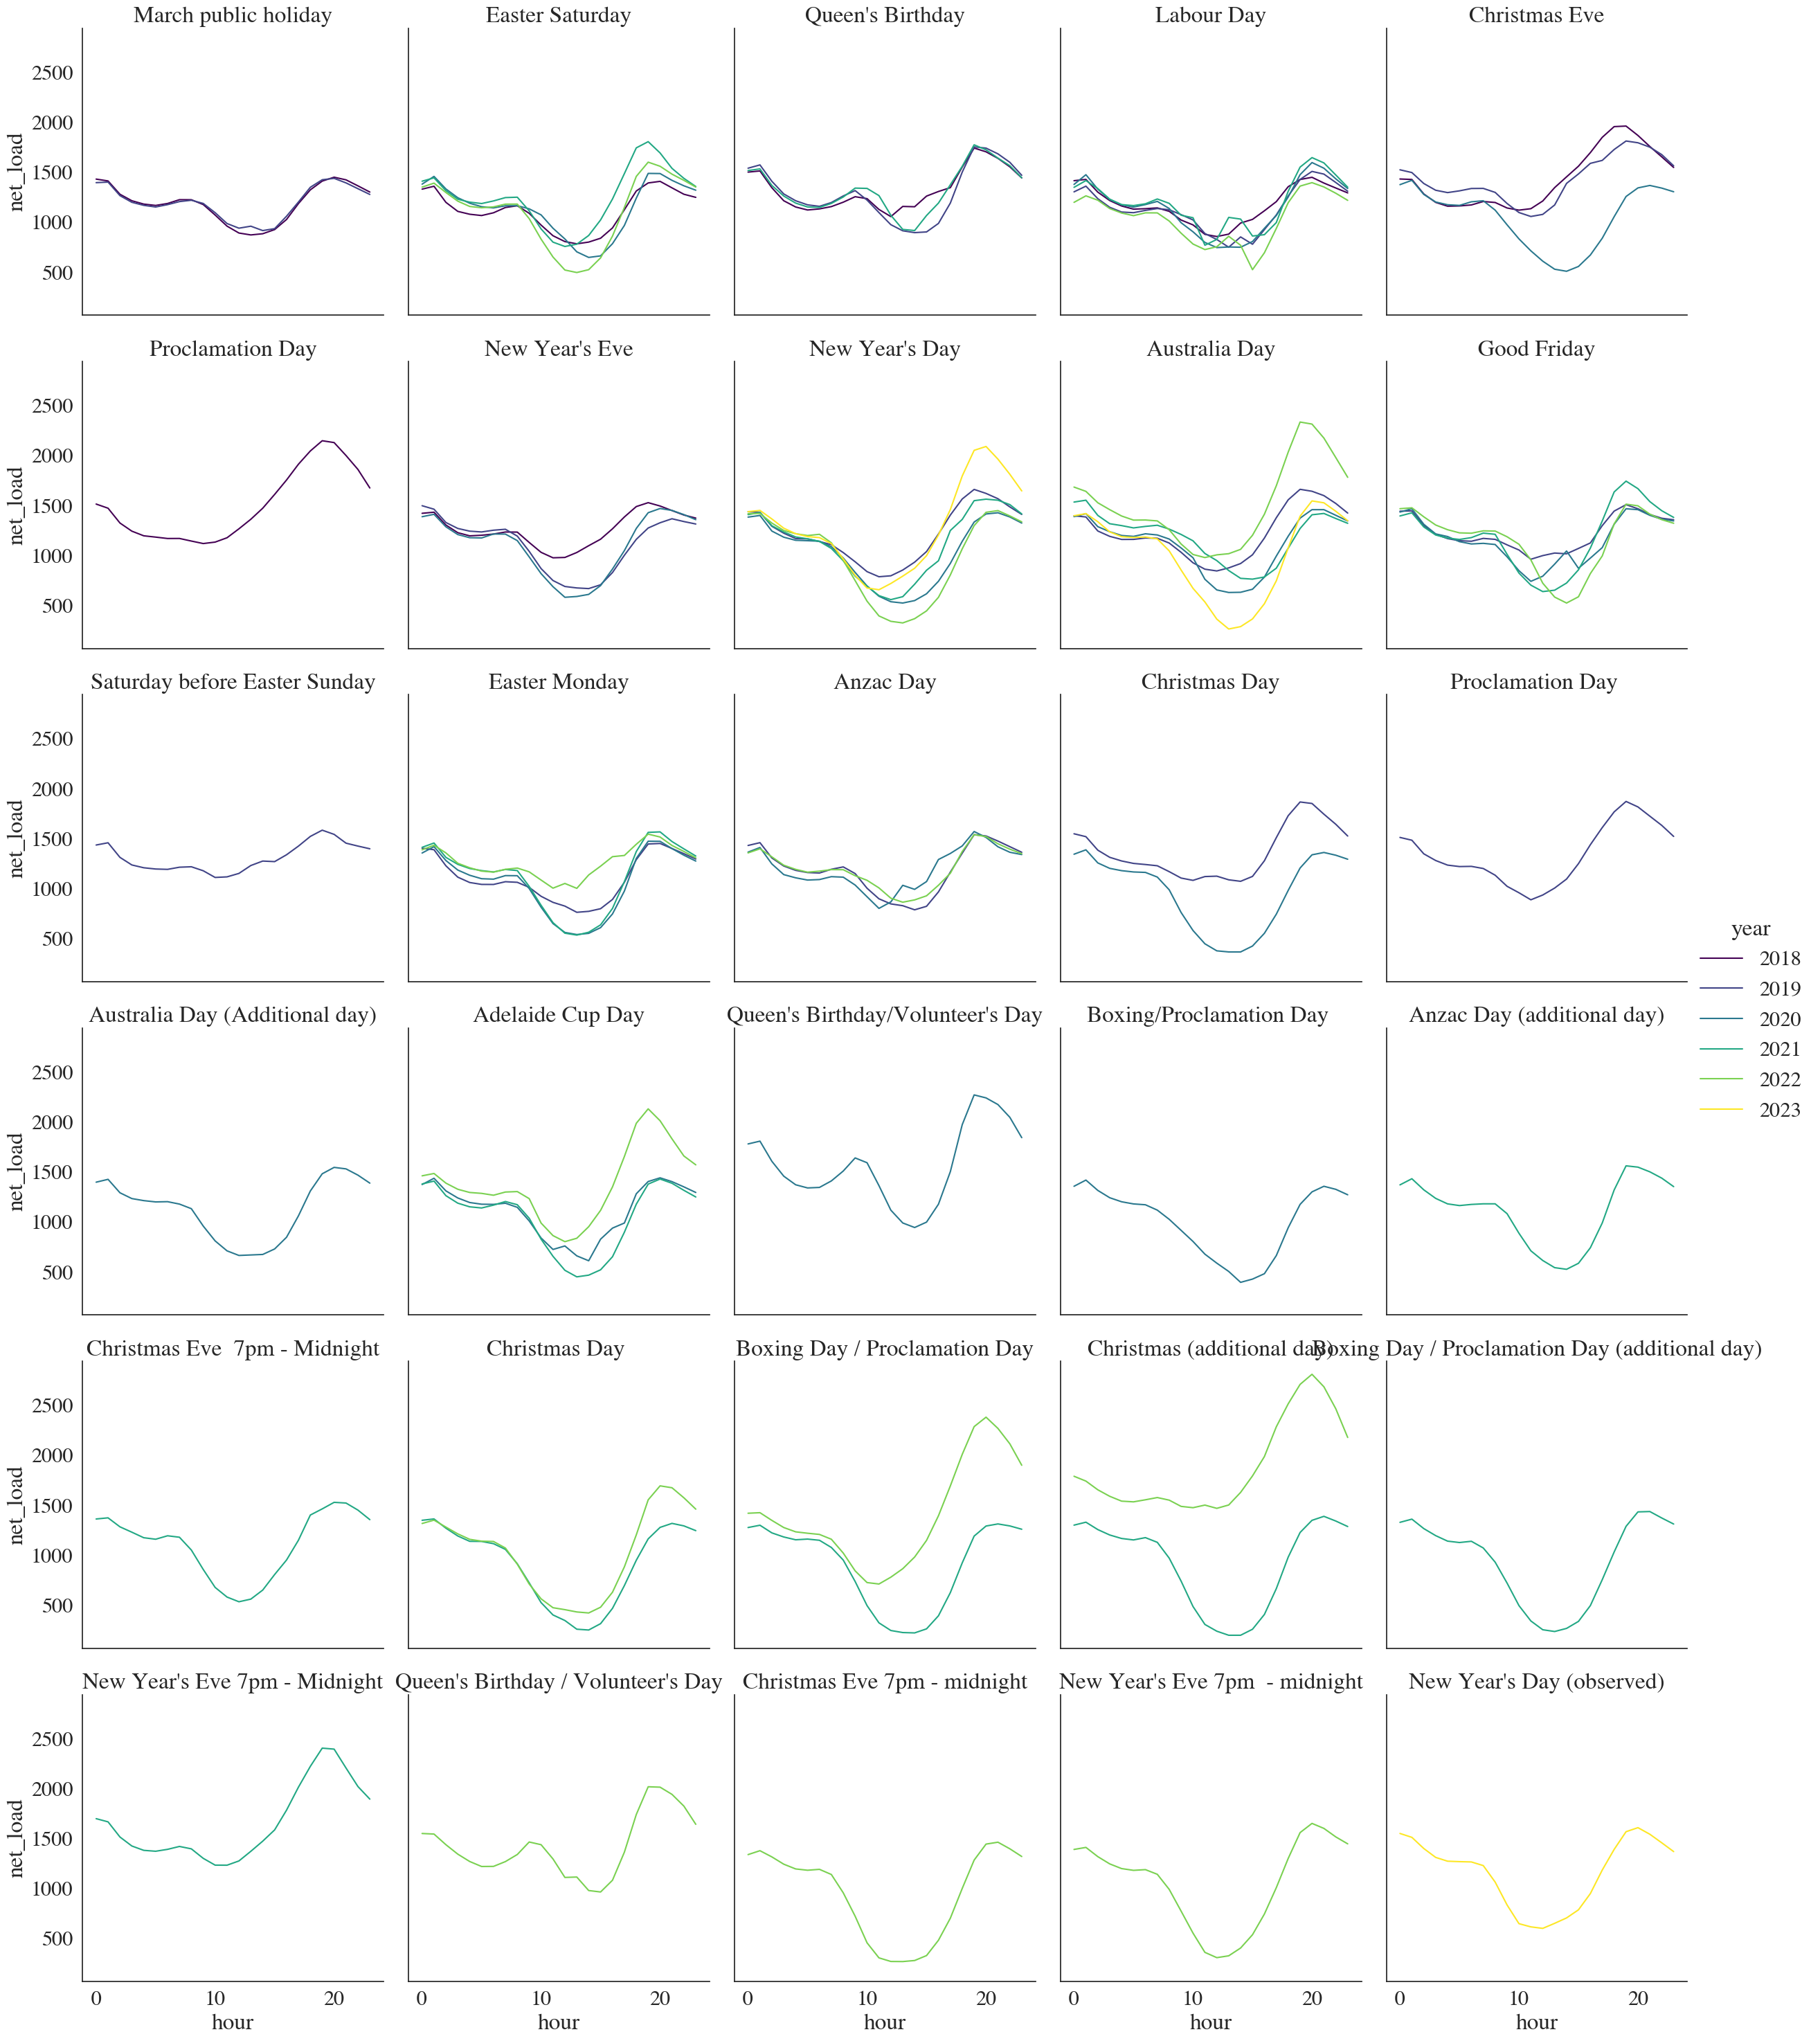

In [18]:
df_holidays = df[df['holiday'].notna()]
g = sns.relplot(df_holidays.reset_index(), x='hour', y='net_load', kind='line', col_wrap=6,
                col='holiday', hue='year', palette='viridis')
g.set_titles("{col_name}")
#g.savefig('../plots/')